In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

#import pickle

In [2]:
df_Cardio = pd.read_csv('Cardio_Disease1.csv') 
df_Cardio

,age,gender,ap_hi,ap_lo,cholesterol,gluc,bmi,cardio
0,50,2,110,80,1,1,21.967120,0
1,55,1,140,90,3,1,34.927679,1
2,51,1,130,70,3,1,23.507805,1
3,48,2,150,100,1,1,28.710479,1
4,60,1,120,80,2,2,29.384676,0
...,...,...,...,...,...,...,...,...
59302,51,1,170,90,1,1,21.604105,1
59303,53,1,130,90,1,1,23.661439,1
59304,57,1,150,80,1,1,29.384757,1
59305,61,1,135,80,1,2,27.099251,1


# Modeling

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_Cardio.drop('cardio', axis=1), df_Cardio.cardio, test_size=0.3, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Algorithms:
- Logistic Regression.
- K-nearest neighbors. 
- Decision Tree. 
- Extra Trees. 
- Random Forest.
- Gaussian Naive Bayes. 
- Bernoulli Naive Bayes.

In [4]:
# Create a new KNN model
knn_model = KNeighborsClassifier()
# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
# use gridsearch to test all values for n_neighbors
KNN_gscv = GridSearchCV(knn_model, param_grid, cv=5)

#fit model to data
KNN_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [5]:
# Check top performing n_neighbors value
KNN_gscv.best_params_

{'n_neighbors': 24}

In [6]:
lr_model = LogisticRegression(solver="lbfgs", random_state=0)
knn_model = KNeighborsClassifier(n_neighbors = 24)
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
GaussianNB_model = GaussianNB()
BernoulliNB_model = BernoulliNB()

lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
GaussianNB_model.fit(X_train, y_train)
BernoulliNB_model.fit(X_train, y_train)

BernoulliNB()

In [7]:
# Quick peek at each model performance

model_names = ["lr_model", "knn_model", "dt_model", "rf_model", "et_model", "GaussianNB_model", "BernoulliNB_model"]
models = []
accuracies = []
precisions = []
recalls = []
roc_scores = []
f1_scores = []

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} Score of train set: {round(curr_model.score(X_train, y_train), 5)}')
    print(f'{model_name} Accuracy: {round(accuracy_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} Precision: {round(precision_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} Recall: {round(recall_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} F1_Score: {round(f1_score(y_test, curr_model.predict(X_test)), 5)}\n\n')
    
    models.append(model_name)
    accuracies.append(round(accuracy_score(y_test, curr_model.predict(X_test)),5))
    f1_scores.append(round(f1_score(y_test, curr_model.predict(X_test)),5))
    precisions.append(round(precision_score(y_test, curr_model.predict(X_test)),5))
    recalls.append(round(recall_score(y_test, curr_model.predict(X_test)),5))
    roc_scores.append(round(roc_auc_score(y_test, curr_model.predict(X_test)),5))

lr_model Score of train set: 0.71747
lr_model Accuracy: 0.7209
lr_model Precision: 0.74917
lr_model Recall: 0.67594
lr_model F1_Score: 0.71067


knn_model Score of train set: 0.73592
knn_model Accuracy: 0.71787
knn_model Precision: 0.74591
knn_model Recall: 0.67284
knn_model F1_Score: 0.70749


dt_model Score of train set: 0.97555
dt_model Accuracy: 0.61002
dt_model Precision: 0.6171
dt_model Recall: 0.60856
dt_model F1_Score: 0.6128


rf_model Score of train set: 0.97543
rf_model Accuracy: 0.65537
rf_model Precision: 0.65406
rf_model Recall: 0.68015
rf_model F1_Score: 0.66685


et_model Score of train set: 0.97555
et_model Accuracy: 0.64093
et_model Precision: 0.64309
et_model Recall: 0.65599
et_model F1_Score: 0.64948


GaussianNB_model Score of train set: 0.70824
GaussianNB_model Accuracy: 0.70944
GaussianNB_model Precision: 0.75974
GaussianNB_model Recall: 0.62452
GaussianNB_model F1_Score: 0.68552


BernoulliNB_model Score of train set: 0.70343
BernoulliNB_model Accuracy: 0.70528


In [9]:
for model_name in model_names:
    curr_model = eval(model_name)
    y_pred = curr_model.predict(X_test)
    print(f'{model_name}:')
    print(f'{classification_report(y_test, y_pred)}\n')
    print('---------------------------------')

lr_model:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      8770
           1       0.75      0.68      0.71      9023

    accuracy                           0.72     17793
   macro avg       0.72      0.72      0.72     17793
weighted avg       0.72      0.72      0.72     17793


---------------------------------
knn_model:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      8770
           1       0.75      0.67      0.71      9023

    accuracy                           0.72     17793
   macro avg       0.72      0.72      0.72     17793
weighted avg       0.72      0.72      0.72     17793


---------------------------------
dt_model:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      8770
           1       0.62      0.61      0.61      9023

    accuracy                           0.61     17793
   macro avg       0.61    

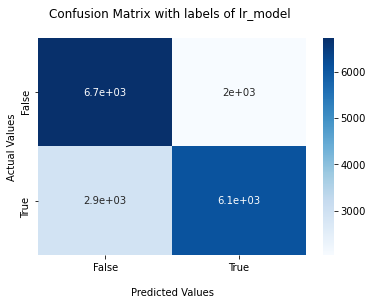

-----------------------------


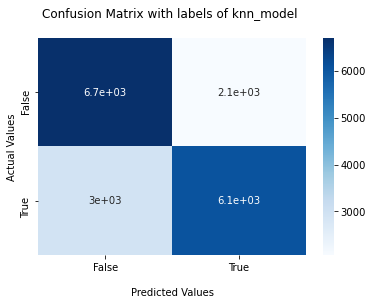

-----------------------------


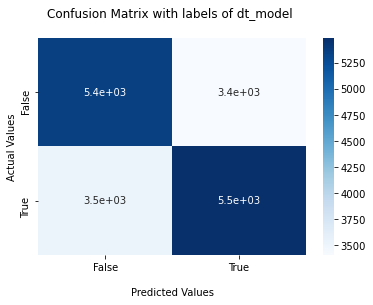

-----------------------------


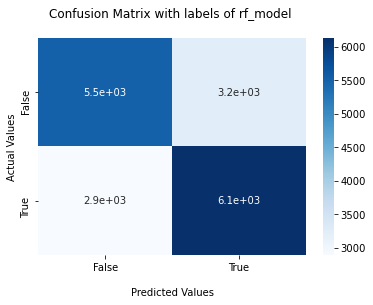

-----------------------------


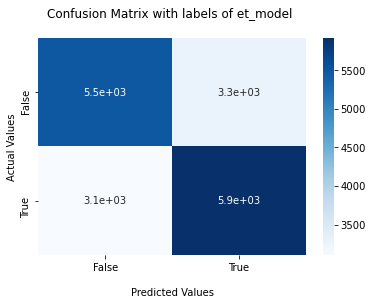

-----------------------------


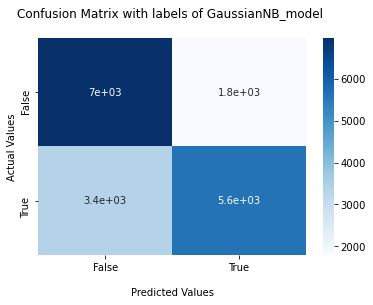

-----------------------------


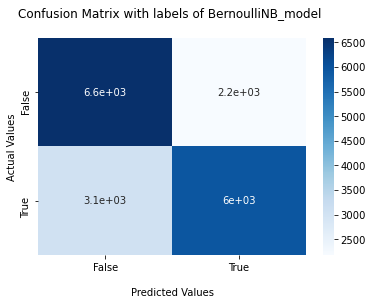

-----------------------------


In [10]:
for model_name in model_names:
    curr_model = eval(model_name)
    cf_matrix=metrics.confusion_matrix(y_test, curr_model.predict(X_test))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    
    ax.set_title(f'Confusion Matrix with labels of {model_name} \n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    
    # abels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()
    print('-----------------------------')

In [11]:
#or can you use by pickle

#for model_name in models:
#    curr_model = eval(model_name)
#    curr_model.fit(X_train, y_train)
#    with open(f"C:\\Users\\Rahaf\\Downloads/{model_name}.pickle", "wb") as pfile:
#        pickle.dump(curr_model, pfile)

In [12]:
# Load pre-trained/tuned models

#model_names = ["lr_model", "knn_model", "dt_model", "rf_model", "et_model"]

#for model_name in model_names:
#    with open(f"C:\\Users\\Rahaf\\Downloads/{model_name}.pickle", "rb") as pfile:
#        exec(f"{model_name} = pickle.load(pfile)")

#model_vars = [eval(n) for n in model_names]
#model_list = list(zip(model_names, model_vars))
#model_list

In [13]:
# Quick peek at each model performance

#for model_name in model_names:
#    curr_model = eval(model_name)
#    print(f'{model_name} score: {curr_model.score(X_train, y_train)}')
#    print(f'{model_name} Accuracy: {metrics.accuracy_score(y_test, curr_model.predict(x_test))}')
#    print(f'{model_name} Precision: {metrics.precision_score(y_test, curr_model.predict(x_test))}')
#    print(f'{model_name} Recall: {metrics.recall_score(y_test, curr_model.predict(x_test))}')
#    print(f'{model_name} F1_Score: {metrics.f1_score(y_test, curr_model.predict(x_test))}\n')

In [14]:
acc_log = round(lr_model.score(X_train, y_train) * 100, 2)
acc_knn = round(knn_model.score(X_train, y_train) * 100, 2)
acc_decision_tree = round(dt_model.score(X_train, y_train) * 100, 2)
acc_random_forest = round(rf_model.score(X_train, y_train) * 100, 2)
acc_etc = round(et_model.score(X_train, y_train) * 100, 2)
acc_gaussian = round(GaussianNB_model.score(X_train, y_train) * 100, 2) 
acc_bernoulli = round(BernoulliNB_model.score(X_train, y_train) * 100, 2)


acc_test_log = round(lr_model.score(X_test, y_test) * 100, 2)
acc_test_knn = round(knn_model.score(X_test, y_test) * 100, 2)
acc_test_decision_tree = round(dt_model.score(X_test, y_test) * 100, 2)
acc_test_random_forest = round(rf_model.score(X_test, y_test) * 100, 2)
acc_test_etc = round(et_model.score(X_test, y_test) * 100, 2)
acc_test_gaussian = round(GaussianNB_model.score(X_test, y_test) * 100, 2) 
acc_test_bernoulli = round(BernoulliNB_model.score(X_test, y_test) * 100, 2)

In [15]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','k-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest', 'ExtraTreesClassifier', 
              'Gaussian Naive Bayes', 'Bernoulli Naive Bayes'],
    
    'Score_train': [acc_log, acc_knn, acc_decision_tree, acc_random_forest, acc_etc, 
              acc_gaussian, acc_bernoulli],
    'Score_test': [acc_test_log, acc_test_knn, acc_test_decision_tree, acc_test_random_forest, 
              acc_test_etc, acc_test_gaussian, acc_test_bernoulli]
                    })

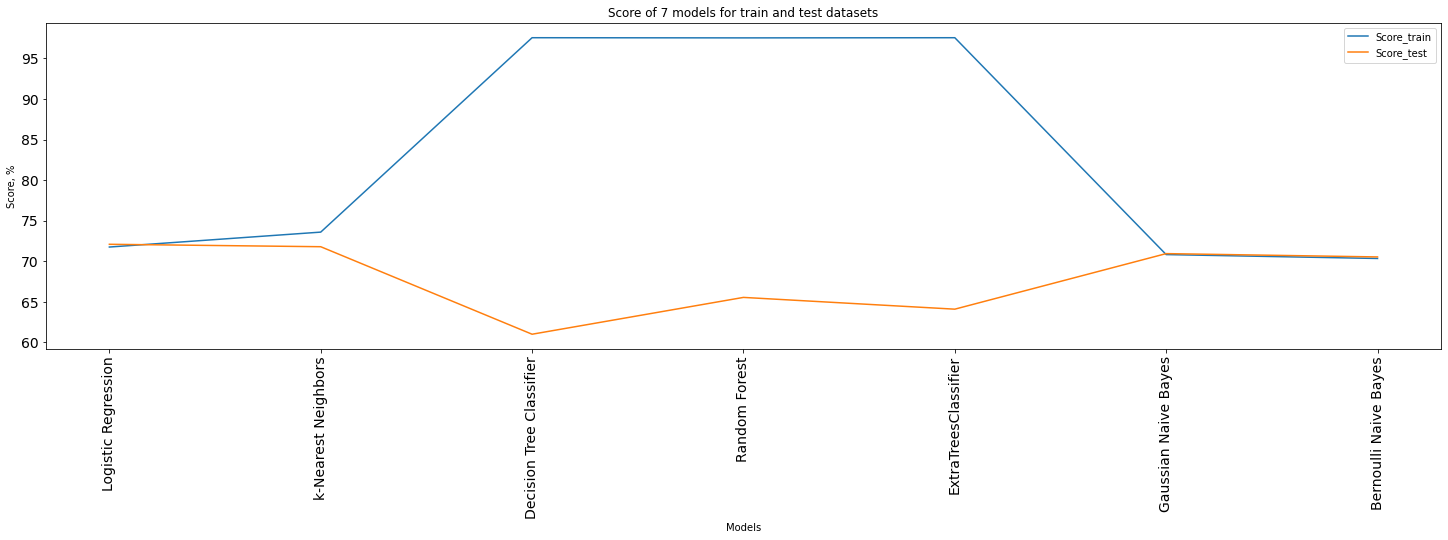

In [16]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 7 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()

In [17]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])

In [18]:
results = pd.DataFrame({"Model" : ['Logistic Regression','k-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest', 'ExtraTreesClassifier', 
              'Gaussian Naive Bayes', 'Bernoulli Naive Bayes'], "Accuracy" : accuracies,"F1" : f1_scores, "Precision" : precisions, "Recall" : recalls, 'ROC Score' :roc_scores})

In [19]:
results = results.merge(models)
results

,Model,Accuracy,F1,Precision,Recall,ROC Score,Score_train,Score_test,Score_diff
0,Logistic Regression,0.72090,0.71067,0.74917,0.67594,0.72155,71.75,72.09,0.34
1,k-Nearest Neighbors,0.71787,0.70749,0.74591,0.67284,0.71852,73.59,71.79,1.80
2,Decision Tree Classifier,0.61002,0.61280,0.61710,0.60856,0.61004,97.56,61.00,36.56
3,Random Forest,0.65537,0.66685,0.65406,0.68015,0.65501,97.54,65.54,32.00
4,ExtraTreesClassifier,0.64093,0.64948,0.64309,0.65599,0.64071,97.56,64.09,33.47
5,Gaussian Naive Bayes,0.70944,0.68552,0.75974,0.62452,0.71066,70.82,70.94,0.12
6,Bernoulli Naive Bayes,0.70528,0.69426,0.73244,0.65987,0.70593,70.34,70.53,0.19


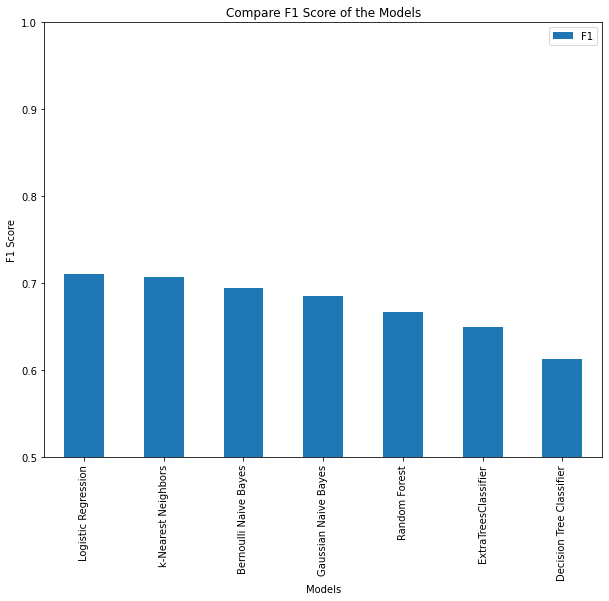

In [23]:
results.nlargest(7,'F1').plot.bar(x='Model', y='F1', figsize=(10,8))

plt.title("Compare F1 Score of the Models")
plt.ylabel("F1 Score")
plt.ylim(0.5, 1.0)
plt.xlabel("Models")
plt.show()

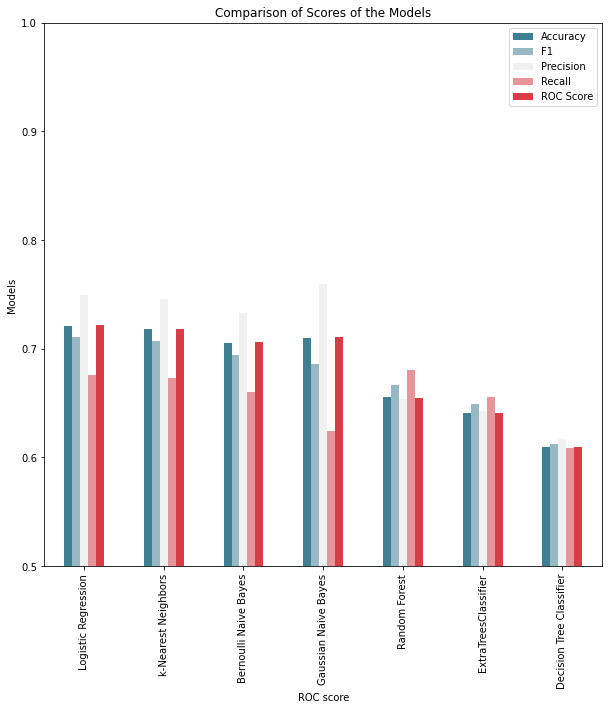

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

results.nlargest(7,'F1').plot.bar(x='Model',y=['Accuracy','F1','Precision','Recall','ROC Score'], cmap=cmap, figsize=(10,10))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.ylim(0.50, 1.0)
plt.xlabel("ROC score")
plt.show()

C:\Users\Rahaf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Rahaf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Rahaf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
 

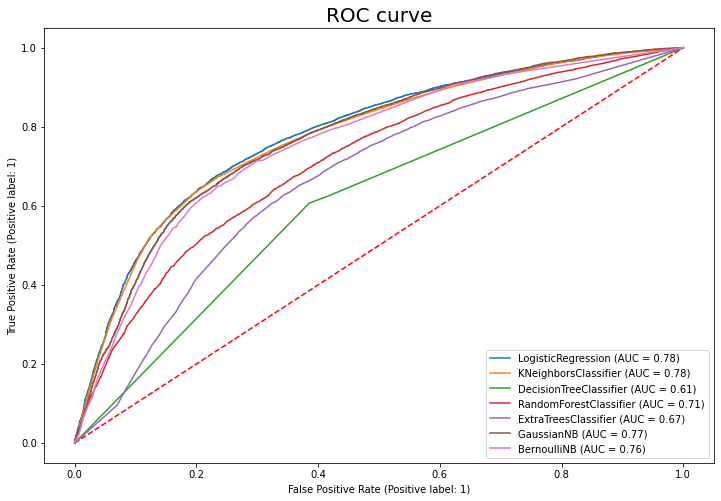

In [29]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'r--')
ax = plt.gca()
for model_name in model_names:
    curr_model = eval(model_name)
    plot_roc_curve(curr_model, X_test, y_test, ax=ax)
    plt.title('ROC curve', size=20)

#### Best Model (Logistic Regression)

In [30]:
y_prob = lr_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.7824358465146274

In [31]:
def threshold(model, category, m):
    pred=(model.predict_proba(X_test)[:,category]>m).astype(int)
    print(classification_report(y_test,pred))

In [32]:
threshold(lr_model,1, 0.5)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      8770
           1       0.75      0.68      0.71      9023

    accuracy                           0.72     17793
   macro avg       0.72      0.72      0.72     17793
weighted avg       0.72      0.72      0.72     17793



C:\Users\Rahaf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


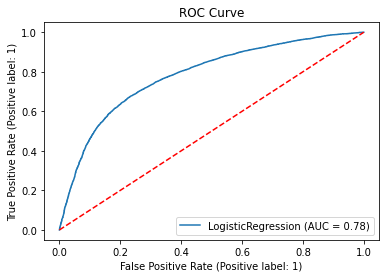

In [33]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()